# Carregando dados
### Utilizando dataset do ENEM 2019
### Baixando via API do Kaggle

In [9]:
!pip install -q kaggle

In [10]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kaggle

dicionario dos dados = https://edisciplinas.usp.br/mod/resource/view.php?id=3597672

yt = https://www.youtube.com/watch?v=Gn6Fm3iDbd8&list=PL5TJqBvpXQv5N3iV68bGBkea0HjMk98lR&index=3

Dataset URL: https://www.kaggle.com/datasets/asneto/microdados-enem-2019-por-estado

In [12]:
kaggle.api.authenticate()
kaggle.api.dataset_download_files('asneto/microdados-enem-2019-por-estado', unzip=True, path="/content/")

Dataset URL: https://www.kaggle.com/datasets/asneto/microdados-enem-2019-por-estado


In [13]:
df = pd.read_csv("/content/Selec_SC.txt", sep=";")
df.head(10)

,ID,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,5545,190001010172,2019,4208203,Itajaí,42,SC,17,M,1,...,A,A,A,B,A,A,B,A,A,A
1,10328,190001014955,2019,4209102,Joinville,42,SC,20,F,1,...,A,A,A,B,A,A,B,A,A,A
2,36881,190001041509,2019,4211306,Navegantes,42,SC,18,F,1,...,A,A,A,B,A,A,B,A,A,A
3,59150,190001063779,2019,4200606,Águas Mornas,42,SC,22,F,1,...,A,A,A,B,A,B,B,A,A,B
4,85260,190001089889,2019,4205407,Florianópolis,42,SC,21,F,1,...,A,A,A,B,A,A,C,A,A,A
5,98168,190001102797,2019,4208203,Itajaí,42,SC,29,F,1,...,A,A,A,B,A,A,E,A,A,B
6,154455,190001159087,2019,4209102,Joinville,42,SC,16,F,1,...,B,B,B,C,B,B,E,A,D,B
7,179624,190001184257,2019,4208203,Itajaí,42,SC,19,M,1,...,A,A,A,B,B,A,C,A,A,A
8,206265,190001210898,2019,4207502,Indaial,42,SC,17,F,1,...,A,A,A,B,A,A,B,A,A,B
9,231633,190001236266,2019,4216602,São José,42,SC,20,F,1,...,A,A,A,B,A,A,D,A,A,B


# Filtrando colunas desejadas

In [14]:
features= ["ID","TP_SEXO","NU_IDADE", "TP_COR_RACA", "NO_MUNICIPIO_RESIDENCIA", "TP_ESCOLA", "NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO", "TP_LINGUA",
           "Q001","Q002","Q005","Q006", "Q025 "]

In [15]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109515 entries, 0 to 109514
Columns: 137 entries, ID to Q025 
dtypes: float64(24), int64(72), object(41)
memory usage: 114.5+ MB


,ID,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,...,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,1.095150e+05,1.095150e+05,109515.0,1.095150e+05,109515.0,109515.000000,109515.000000,109515.000000,109515.000000,1.061610e+05,...,79268.000000,109515.000000,84695.000000,84695.000000,84695.000000,84695.000000,84695.000000,84695.000000,84695.000000,109515.000000
mean,2.929874e+06,1.900039e+11,2019.0,4.208761e+06,42.0,20.623129,1.027777,1.418527,1.035666,4.063959e+06,...,548.551149,0.376916,1.104375,124.510302,123.418856,116.611606,123.065116,93.182833,580.788712,3.536803
std,1.407419e+06,1.407552e+06,0.0,5.194222e+03,0.0,6.238157,0.410002,0.857561,0.239251,5.587326e+05,...,108.946887,0.484616,0.667512,30.461587,40.680511,38.150131,34.915383,56.502495,174.321855,1.285910
min,5.545000e+03,1.900010e+11,2019.0,4.200051e+06,42.0,1.000000,0.000000,0.000000,0.000000,1.100015e+06,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.669137e+06,1.900027e+11,2019.0,4.204608e+06,42.0,17.000000,1.000000,1.000000,1.000000,4.203006e+06,...,459.300000,0.000000,1.000000,120.000000,120.000000,100.000000,120.000000,60.000000,500.000000,3.000000
50%,3.054863e+06,1.900041e+11,2019.0,4.208203e+06,42.0,18.000000,1.000000,1.000000,1.000000,4.207502e+06,...,538.900000,0.000000,1.000000,120.000000,120.000000,120.000000,120.000000,100.000000,580.000000,4.000000
75%,3.903240e+06,1.900049e+11,2019.0,4.211900e+06,42.0,21.000000,1.000000,1.000000,1.000000,4.214201e+06,...,627.200000,1.000000,1.000000,140.000000,140.000000,140.000000,140.000000,140.000000,680.000000,4.000000
max,5.091338e+06,1.900061e+11,2019.0,4.220000e+06,42.0,84.000000,4.000000,5.000000,4.000000,5.300108e+06,...,984.200000,1.000000,9.000000,200.000000,200.000000,200.000000,200.000000,200.000000,980.000000,20.000000


# Filtrando

In [16]:
(df["NO_MUNICIPIO_RESIDENCIA"] == "Araranguá").value_counts()

,count
NO_MUNICIPIO_RESIDENCIA,
False,108447
True,1068


In [17]:
# porcantagem de provas aplicadas em aru em relacao ao total de sc
proporcao = (df["NO_MUNICIPIO_RESIDENCIA"] == "Araranguá").value_counts()
print((proporcao[1]/proporcao.sum())*100)
print((proporcao[0]/proporcao.sum())*100)
# aru < 1%

0.9752088754965074
99.0247911245035


<ipython-input-17-8a6027376386>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print((proporcao[1]/proporcao.sum())*100)
<ipython-input-17-8a6027376386>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print((proporcao[0]/proporcao.sum())*100)


In [18]:
df_aru = df[df["NO_MUNICIPIO_RESIDENCIA"] == "Araranguá"]
df_aru.head()

,ID,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
39,679688,190001684332,2019,4201406,Araranguá,42,SC,18,F,1,...,B,A,B,C,B,A,D,B,B,B
232,679887,190001684531,2019,4201406,Araranguá,42,SC,22,M,1,...,B,A,B,B,B,A,E,A,B,B
240,679895,190001684539,2019,4201406,Araranguá,42,SC,18,F,1,...,A,A,A,A,A,A,C,A,A,B
327,679987,190001684631,2019,4201406,Araranguá,42,SC,29,M,0,...,B,A,B,B,B,A,D,A,B,B
351,680012,190001684656,2019,4201406,Araranguá,42,SC,17,M,1,...,B,A,A,B,A,B,D,A,C,B


 # Análise de araranguá

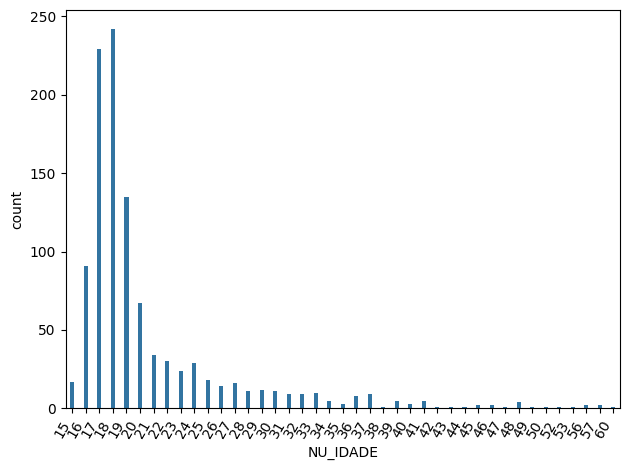

In [19]:
#grafico da distribuição das idades na prova enem 2019 - ararangua

sns.countplot(x="NU_IDADE", data=df_aru, width=0.3)  # Ajuste o valor de 'width' para controlar a largura da barra
plt.xticks(rotation=60, ha="right")
plt.tight_layout()
plt.show()



<ipython-input-20-fcab6c5c293d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="TP_SEXO", data=df_aru, width=0.3, palette=palette)


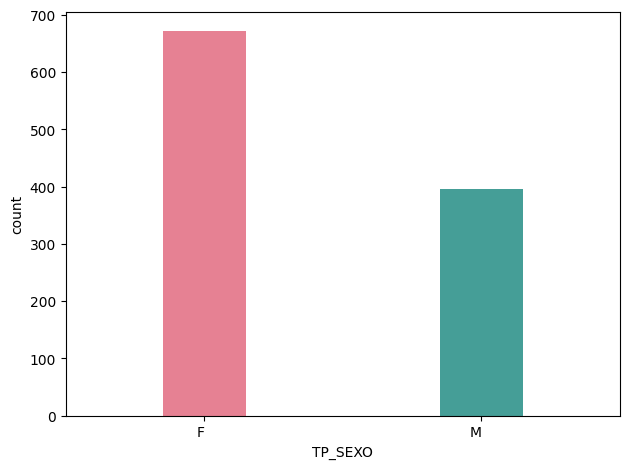

In [20]:
#grafico da distribuição dos generos na prova enem 2019 - ararangua

palette = sns.color_palette("husl", len(df_aru["TP_SEXO"].unique()))
sns.countplot(x="TP_SEXO", data=df_aru, width=0.3, palette=palette)
plt.xticks( ha="right")
plt.tight_layout()
plt.show()



In [21]:
df_aru["TESTS_GRADE"] = (df_aru["NU_NOTA_CN"] + df_aru["NU_NOTA_CH"] + df_aru["NU_NOTA_LC"] + df_aru["NU_NOTA_MT"])/5

<ipython-input-21-4413fa0bc19d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aru["TESTS_GRADE"] = (df_aru["NU_NOTA_CN"] + df_aru["NU_NOTA_CH"] + df_aru["NU_NOTA_LC"] + df_aru["NU_NOTA_MT"])/5


In [22]:
df_aru["TESTS_GRADE"].head()

,TESTS_GRADE
39,388.82
232,392.00
240,409.10
327,424.52
351,430.78


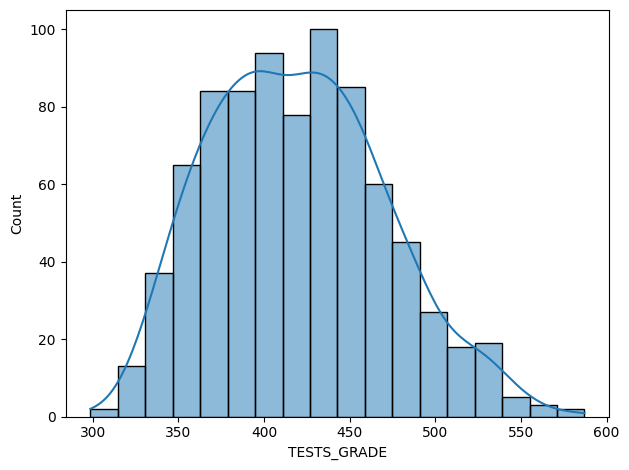

In [23]:
#df_aru = df_aru.reset_index()

# histograma com a distribuiçao das notas na cidade de ararangua

sns.histplot(data=df_aru, x="TESTS_GRADE", kde=True)

plt.tight_layout()
plt.show()

In [24]:
df_aru

,ID,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,TESTS_GRADE
39,679688,190001684332,2019,4201406,Araranguá,42,SC,18,F,1,...,A,B,C,B,A,D,B,B,B,388.82
232,679887,190001684531,2019,4201406,Araranguá,42,SC,22,M,1,...,A,B,B,B,A,E,A,B,B,392.00
240,679895,190001684539,2019,4201406,Araranguá,42,SC,18,F,1,...,A,A,A,A,A,C,A,A,B,409.10
327,679987,190001684631,2019,4201406,Araranguá,42,SC,29,M,0,...,A,B,B,B,A,D,A,B,B,424.52
351,680012,190001684656,2019,4201406,Araranguá,42,SC,17,M,1,...,A,A,B,A,B,D,A,C,B,430.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109364,5084915,190006105288,2019,4201406,Araranguá,42,SC,19,M,1,...,A,B,C,B,A,E,A,B,B,NaN
109388,5085968,190006106773,2019,4201406,Araranguá,42,SC,23,M,1,...,A,A,B,A,A,D,A,C,B,394.14
109406,5085986,190006106791,2019,4201406,Araranguá,42,SC,19,M,1,...,A,A,B,A,A,E,A,A,A,365.74
109436,5087026,190006108446,2019,4201406,Araranguá,42,SC,29,M,1,...,A,A,C,A,A,D,A,B,B,NaN


In [25]:
df_aru.to_csv("enem_ararangua_2019.csv", index=False)
print("DataFrame salvo como 'enem_ararangua_2019.csv'")

DataFrame salvo como 'enem_ararangua_2019.csv'
